# Save and load a model

A manufacturing company wants to classify their projects based on images and determine the appropriate shipping packaging. Having trained a highly accurate model in PyTorch, you now plan to save the model and its pre-trained weights for future use and to share it with your team, making sure they can seamlessly load it.

The pre-trained model object is available in your workspace as model, and its architecture as ManufacturingCNN.

* Save the pre-trained model as ModelCNN.pth remembering to save the weights, not only the architecture.
* Create a model instance called loaded_model from the class ManufacturingCNN().
* Load ModelCNN.pth weights to loaded_model by passing the weights to .load_state_dict().

In [5]:
import torch
import torch.nn as nn

In [ ]:
# Save the model
torch.save(model.state_dict(),'ModelCNN.pth')

# Create a new model
loaded_model = ManufacturingCNN()
# Load the saved model
loaded_model.load_state_dict(torch.load('ModelCNN.pth'))
print(loaded_model)

**<script.py> output:**

    ManufacturingCNN(
      (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (fc1): Linear(in_features=4096, out_features=4, bias=True)
    )

# Loading a pre-trained model

You are building an application to label images from the social media. This task requires high accuracy and speed. You are going to use a pre-trained ResNet18 model to infer image classes.

* Import resnet18 and ResNet18_Weights from torchvision.models.
* Instantiate the model using resnet18(), setting the weights parameter to weights.
* Set model to the evaluation mode.
* Initialize the input transforms and assign them to transform.

In [6]:
# Import resnet18 model
from torchvision.models import resnet18, ResNet18_Weights

# Initialize model with default weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights = weights)

# Set model to evaluation mode
model.eval()

# Initialize the transforms
transform = weights.transforms()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 124MB/s] 


Using DEFAULT weights is very convenient as it will provide you with the latest version of weights.

**Image classification with ResNet**

You have created the model from the pre-trained ResNet18. Now, it is time to test it on an example image.

You are going to apply preprocessing transforms to an image and classify it. You will need to use the softmax() layer followed by the argmax(), since ResNet18 has been trained on a multi-class dataset.

* Apply the preprocessing transforms to the image and reshape it using .unsqueeze(0) to add the batch dimension.
* Pass the image through the model, reshape the output using .squeeze(0) to remove the batch dimension, and add a softmax() layer.
* Apply argmax() to select the highest-probability class.

In [ ]:
import torch.nn.functional as F

# Apply preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Apply model with softmax layer
prediction = model(batch).squeeze(0).softmax(0)

# Apply argmax
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(category_name)

**Prepare new Input Images**

In [19]:
from PIL import Image

image = Image.open("/kaggle/input/cats-and-dogs-image-classification/train/dogs/dog_103.jpg")
image_tensor = transform(image)
print(image_tensor.shape)
image_reshaped = image_tensor.unsqueeze(0)
print(image_reshaped.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


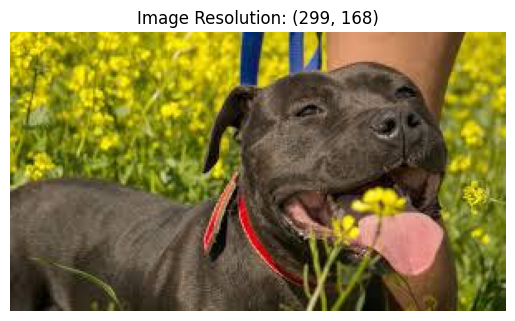

In [15]:
import matplotlib.pyplot as plt

#Plot the image
plt.imshow(image)
plt.title(f"Image Resolution: {image.size}")
plt.axis("off")
plt.show()



**Generating a new prediction**

In [16]:
model.eval()

with torch.no_grad():
    pred = model(image_reshaped).squeeze(0)
    
pred_cls = pred.softmax(0)
cls_id = pred_cls.argmax().item()
cls_name = weights.meta["categories"][cls_id]

print(cls_name)


Labrador retriever


With the ResNet pre-trained model you are able to classify images without training and without any additional labeled data!